# Task 7: Support Vector Machines (SVM)


### Objective: Use SVMs for linear and non-linear classification.


**STEP 1**: Install required libraries

In [1]:
!pip install numpy pandas matplotlib scikit-learn


**STEP 2**: Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**STEP 3**: Load the dataset

I will use the one that's already available directly from sklearn.datasets for ease.

In [3]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Target classes:", data.target_names)


Shape of X: (569, 30)
Shape of y: (569,)
Target classes: ['malignant' 'benign']


**STEP 4**: Split the data into training and testing set

Now let’s split the dataset into 80% training and 20% testing:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (455, 30)
Test set size: (114, 30)


**STEP 5**: Feature Scaling

SVM is sensitive to feature scales, so we need to standardize the data:

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**STEP 6**: Train an SVM model with a Linear Kernel

Now I will train a basic SVM classifier using a linear kernel:

In [6]:
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_linear = linear_svm.predict(X_test_scaled)


**STEP 7**: Evaluate the Linear SVM Model

Now let’s evaluate how well my linear SVM is performing:


In [7]:
print("Accuracy (Linear Kernel):", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))


Accuracy (Linear Kernel): 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[41  2]
 [ 3 68]]


**STEP 8**: Train an SVM model with an RBF (Non-Linear) Kernel

Let’s now train a more powerful SVM using the RBF (Radial Basis Function) kernel:

In [8]:
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rbf = rbf_svm.predict(X_test_scaled)


**STEP 9**: Evaluate the RBF SVM Model

In [9]:
print("Accuracy (RBF Kernel):", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


Accuracy (RBF Kernel): 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
 [[41  2]
 [ 0 71]]


**STEP 10**: Create a 2D synthetic dataset and plot SVM decision boundary

In [10]:
from sklearn.datasets import make_classification

# Create 2D data (2 features)
X_vis, y_vis = make_classification(n_samples=300, n_features=2,
                                    n_informative=2, n_redundant=0,
                                    n_clusters_per_class=1, random_state=42)

# Scale it
X_vis_scaled = StandardScaler().fit_transform(X_vis)

# Train SVM with linear kernel
svm_vis = SVC(kernel='linear', C=1)
svm_vis.fit(X_vis_scaled, y_vis)


SVC(C=1, kernel='linear')

**STEP 11**: Plot decision boundary for the linear SVM

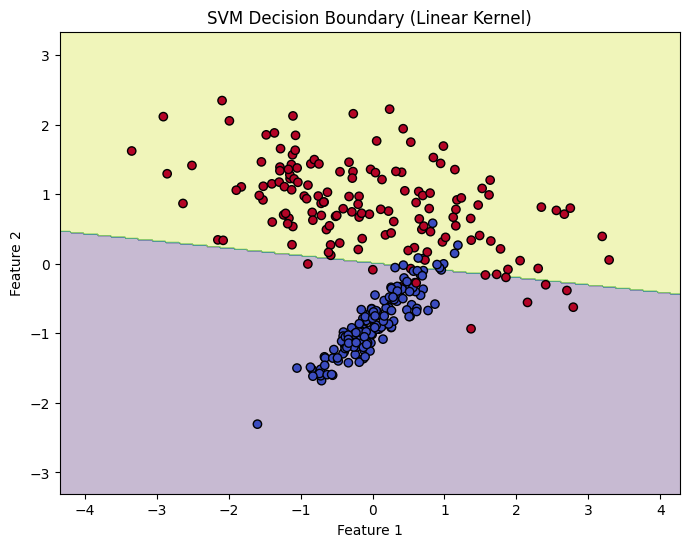

In [11]:
# Plotting the decision boundary
def plot_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM Decision Boundary (Linear Kernel)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Call the function
plot_decision_boundary(X_vis_scaled, y_vis, svm_vis)


**STEP 12**: Plot decision boundary for the RBF (non-linear) SVM

Now let’s repeat the same with an RBF kernel:

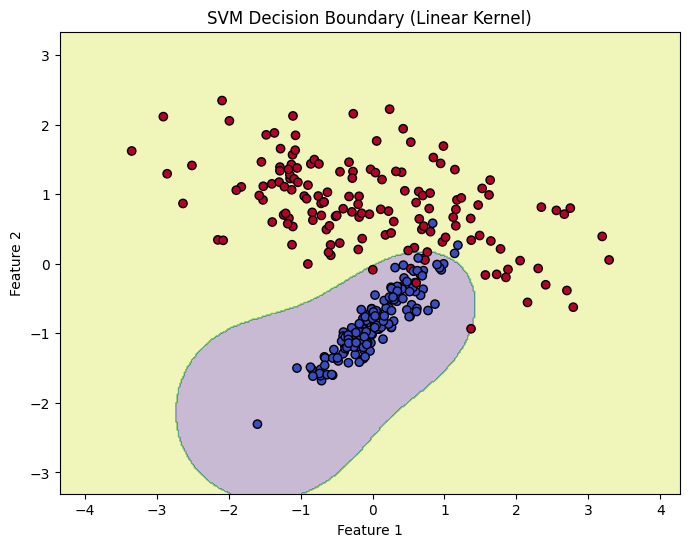

In [12]:
# Train SVM with RBF kernel
svm_rbf_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf_vis.fit(X_vis_scaled, y_vis)

# Plot decision boundary
plot_decision_boundary(X_vis_scaled, y_vis, svm_rbf_vis)


**STEP 13**: Tune Hyperparameters

We’ll now tune two important hyperparameters of SVM:

*  C – regularization strength

*  gamma – only for RBF, defines how far influence of a point reaches

We’ll use GridSearchCV to find the best combination:

In [13]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01],
    'kernel': ['rbf']
}

# Create GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=1)
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=1)

**STEP 14**: Evaluate the Best Tuned SVM Model

Let’s check the best parameters found and test the tuned model’s performance:

In [14]:
# Show best parameters
print("Best Parameters:", grid.best_params_)

# Predict with best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Evaluation
print("Accuracy (Tuned RBF SVM):", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy (Tuned RBF SVM): 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
 [[41  2]
 [ 0 71]]


So, Task 07 is completed.